In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

#%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

In [34]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [35]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
# Combine the test and the train datasets minus the saleprice column before imputing missing values.
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [37]:
all_data.shape

(2919, 79)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000EC0558A470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000EC055B4748>]], dtype=object)

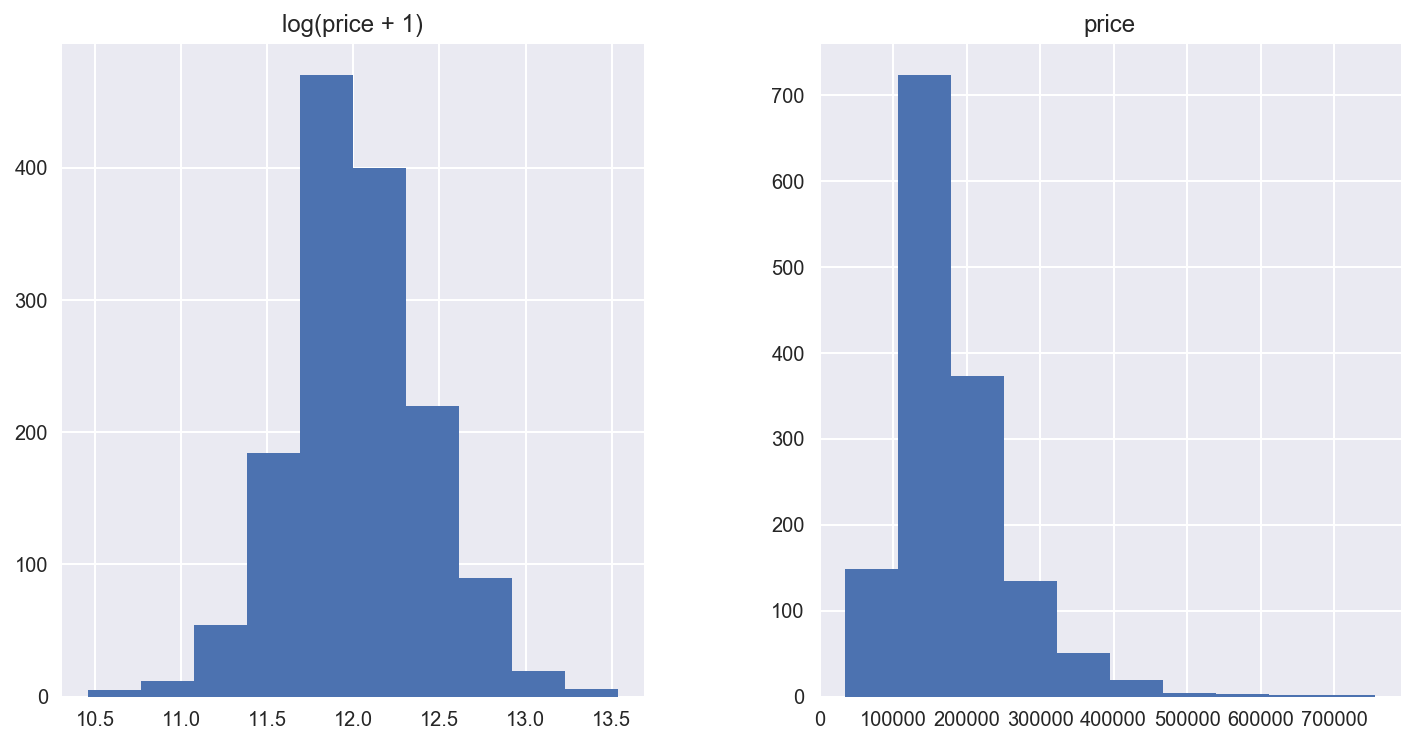

In [38]:
# The histogram of the salesprice shows that is skewed. It can be unskewed with a log transformation
# since it is skewed to the right
saleprice = pd.DataFrame({'log(price + 1)':np.log1p(train['SalePrice']), 'price':train['SalePrice'],})
saleprice.hist()


In [39]:
# Unskew the saleprice with a log transformatio:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [40]:
# The section below unskews all the numeric variabes with a skewness greater than 0.75.

In [41]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

In [42]:
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [43]:
# Get the skewness values for all numeric columns.
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

In [44]:
len(skewed_feats)

36

In [45]:
skewed_feats.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.666326
OpenPorchSF       2.361912
LotFrontage       2.160866
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
GarageYrBlt      -0.648708
dtype: float64

In [46]:
# Retain only colums with a skewness greater than 0.75 
skewed_feats = skewed_feats[skewed_feats > 0.75]

In [47]:
skewed_feats.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.666326
OpenPorchSF       2.361912
LotFrontage       2.160866
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
dtype: float64

In [48]:
skewed_feats = skewed_feats.index

In [49]:
# Log tranform the skewed numeric variables
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [51]:
# Dummify the categorical variables with the get_dummies function in pandas
all_data = pd.get_dummies(all_data)

In [52]:
#filling NA's with the mean of the column: Another run will be made with the medians later on
all_data = all_data.fillna(all_data.mean())

In [53]:
# Separate the data back into the train and test sets:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [54]:
# Write copies of the transformed dataset back to csv files to  be used by other modules.
X_train.to_csv('X_train_cleaned.csv', index=True)
X_test.to_csv('X_test_cleaned.csv')
y.to_csv('y_SalePrice_cleaned.csv', index=True)

In [55]:
# Import the Lasso modules
from sklearn.linear_model import LassoCV, LassoLarsCV

In [56]:
from sklearn.metrics import r2_score

In [66]:
# Create and train a Lasso Model with various lambdas
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005])

y_pred_lasso = lasso.fit(X_train, y)
y_pred_lasso


LassoCV(alphas=[1, 0.1, 0.001, 0.0005], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [67]:
train_lasso = y_pred_lasso.predict(X_train)
train_lasso

array([ 12.24488065,  12.16093153,  12.29468479, ...,  12.4185593 ,
        11.82817286,  11.85732441])

In [70]:
r2_score_lasso = r2_score(y, train_lasso)
print("r^2 on train data : %f" % r2_score_lasso)

r^2 on train data : 0.930822


In [65]:
# Predict on the test data set
y_pred_lasso2 = y_pred_lasso.predict(X_test)

y_pred_lasso2

array([ 11.69490559,  11.92823243,  12.10183291, ...,  12.03779924,
        11.68640318,  12.33887195])

In [62]:
# Get most important coefficients of the variablesused in the Lasso model
coef = pd.Series(lasso.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
imp_coef

RoofMatl_ClyTile        -0.704161
MSZoning_C (all)        -0.292023
Condition2_PosN         -0.190552
Neighborhood_Edwards    -0.052560
SaleCondition_Abnorml   -0.047116
MSZoning_RM             -0.037698
CentralAir_N            -0.035440
GarageCond_Fa           -0.031688
LandContour_Bnk         -0.030934
SaleType_WD             -0.030656
OverallQual              0.053160
KitchenQual_Ex           0.063709
Exterior1st_BrkFace      0.070464
Neighborhood_NridgHt     0.071620
LotArea                  0.071826
Functional_Typ           0.072597
Neighborhood_NoRidge     0.085717
Neighborhood_Crawfor     0.105138
Neighborhood_StoneBr     0.112493
GrLivArea                0.400009
dtype: float64

In [63]:
np.savetxt('lasso_pred.csv', y_pred_lasso2, delimiter=',')

Text(0.5,1,'Lasso R^2: 0.930822')

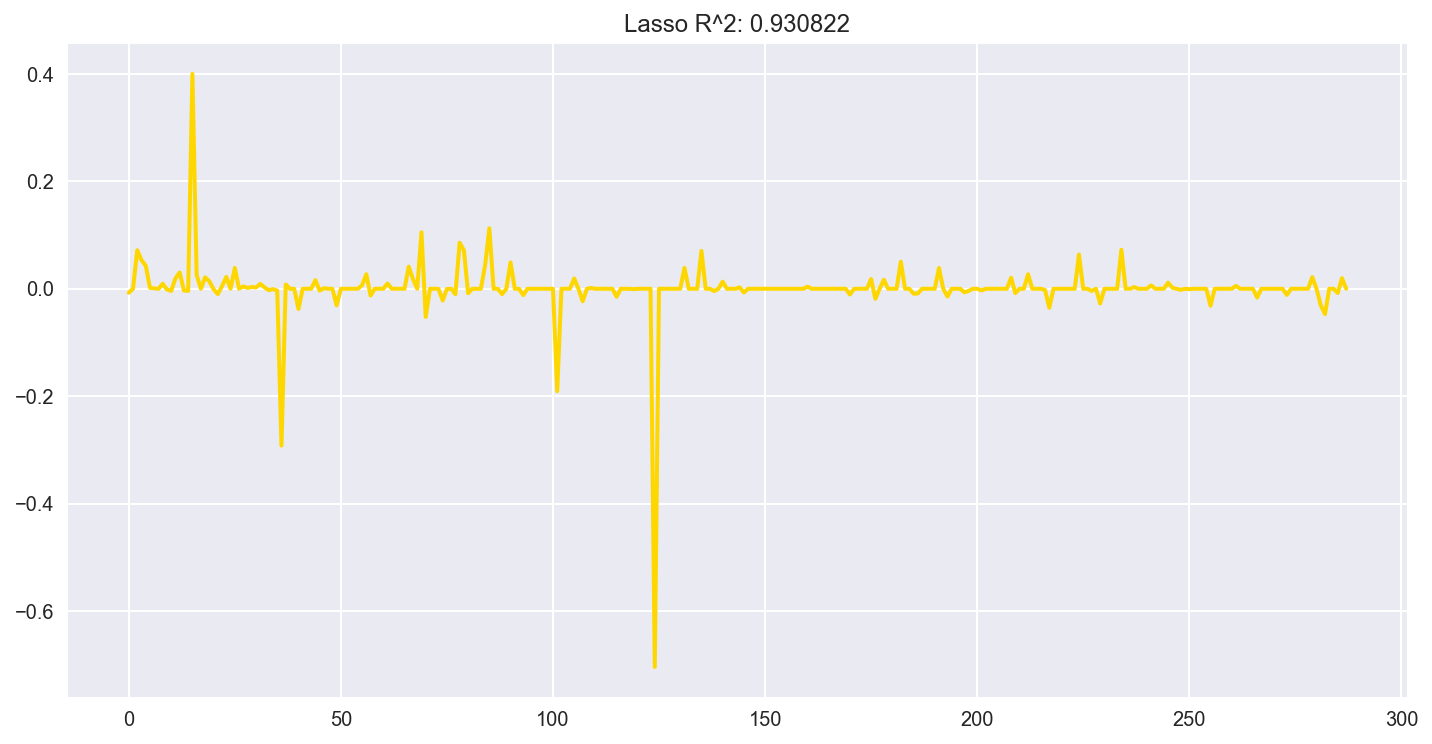

In [78]:
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.title("Lasso R^2: %f"
          % (r2_score_lasso))

In [ ]:
plt.plot(coef, color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f"
          % (r2_score_lasso))
plt.show()